In [3]:
import os
import pandas as pd

def read_data(File_path):
    # Open the file
    file = open(File_path, 'r')

    # Split the text data into lines
    lines = file.readlines()

    # Extract the column names from the header line
    column_names = lines[0].strip().split('|')
    column_names = [col.strip() for col in column_names]

    # Create a list of rows
    rows = []
    for line in lines[2:]:  # Skip the header and column names lines
        if line.strip():
            #row = line.strip().split()
            # only for the data set main 2 file.
            row = line.strip().replace('0.00001-', '0.00001 ').split()
            rows.append(row)
    # Create a pandas DataFrame from the list of rows
    data = pd.DataFrame(rows, columns=column_names)
    # Convert the data types of the columns
    data = data.astype({
                        'absolute angle of inclination': float, 'angle of inclination': float, 'number of electrodes': float,
                        'voltage magnitude': float, 'voltage frequency': float,'electrode dimension': float,
                        'x pitch': float, 'number of phases': float, 'grain mass density': float,
                        'mesh size': float, 'gravity': float, 'phase shift': float,
                        'maximum classified radius': float,'distance between dust generation and first electrode': float,
                        'yield': float
    })
    return data

In [4]:
Folder_name = "Sample Dataset"
File_name1 = "data_set_main1.txt"
File_name2 = "data_set_main2.txt"

File_path1 = os.path.join(Folder_name, File_name1)
File_path2 = os.path.join(Folder_name, File_name2)

data1 = read_data(File_path1)
data2 = read_data(File_path2)




data = pd.concat([data1, data2], ignore_index=True)

data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,maximum classified radius,distance between dust generation and first electrode,yield
0,355.0,5.0,3.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.007250,0.126490
1,355.0,5.0,4.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.006375,0.092699
2,355.0,5.0,5.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.005500,0.082674
3,355.0,5.0,6.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.009626,0.175985
4,355.0,5.0,2.0,1000.0,10.0,3.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.007625,0.356726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,320.0,40.0,4.0,500.0,10.0,3.0,20.0,4.0,1000.0,0.001,5.00,90.0,0.00001,0.050346,0.128815
2060,320.0,40.0,2.0,500.0,10.0,4.0,20.0,4.0,1000.0,0.001,5.00,90.0,0.00001,0.016782,0.087109
2061,320.0,40.0,3.0,500.0,10.0,4.0,20.0,4.0,1000.0,0.001,5.00,90.0,0.00001,0.033564,2.890049
2062,320.0,40.0,4.0,500.0,10.0,4.0,20.0,4.0,1000.0,0.001,5.00,90.0,0.00001,0.050346,0.062975


In [6]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   absolute angle of inclination                         2064 non-null   float64
 1   angle of inclination                                  2064 non-null   float64
 2   number of electrodes                                  2064 non-null   float64
 3   voltage magnitude                                     2064 non-null   float64
 4   voltage frequency                                     2064 non-null   float64
 5   electrode dimension                                   2064 non-null   float64
 6   x pitch                                               2064 non-null   float64
 7   number of phases                                      2064 non-null   float64
 8   grain mass density                                    2064

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,maximum classified radius,distance between dust generation and first electrode,yield
count,2064.00000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.0,2064.000000,2.064000e+03,2064.000000,2064.0,2.064000e+03,2064.000000,2064.000000
mean,240.68314,29.413760,3.293605,516.327519,8.258236,3.489826,23.544089,4.0,1512.427326,1.000000e-03,6.493803,90.0,1.000000e-05,0.017522,0.636652
std,138.82817,16.440239,1.125235,351.838715,2.382819,1.047534,5.070993,0.0,763.679176,4.337860e-19,2.226241,0.0,1.694476e-21,0.012306,0.860602
min,10.00000,5.000000,2.000000,100.000000,5.000000,2.000000,20.000000,4.0,1000.000000,1.000000e-03,5.000000,90.0,1.000000e-05,0.003500,0.000000
25%,40.00000,20.000000,2.000000,300.000000,5.000000,3.000000,20.000000,4.0,1000.000000,1.000000e-03,5.000000,90.0,1.000000e-05,0.009851,0.002586
50%,320.00000,30.000000,3.000000,500.000000,10.000000,3.000000,20.000000,4.0,1000.000000,1.000000e-03,5.000000,90.0,1.000000e-05,0.013225,0.201916
75%,340.00000,40.000000,4.000000,1000.000000,10.000000,4.000000,25.000000,4.0,2650.000000,1.000000e-03,9.810000,90.0,1.000000e-05,0.020977,1.030993
max,355.00000,75.000000,6.000000,1000.000000,10.000000,6.000000,40.000000,4.0,2650.000000,1.000000e-03,9.810000,90.0,1.000000e-05,0.075519,6.494296


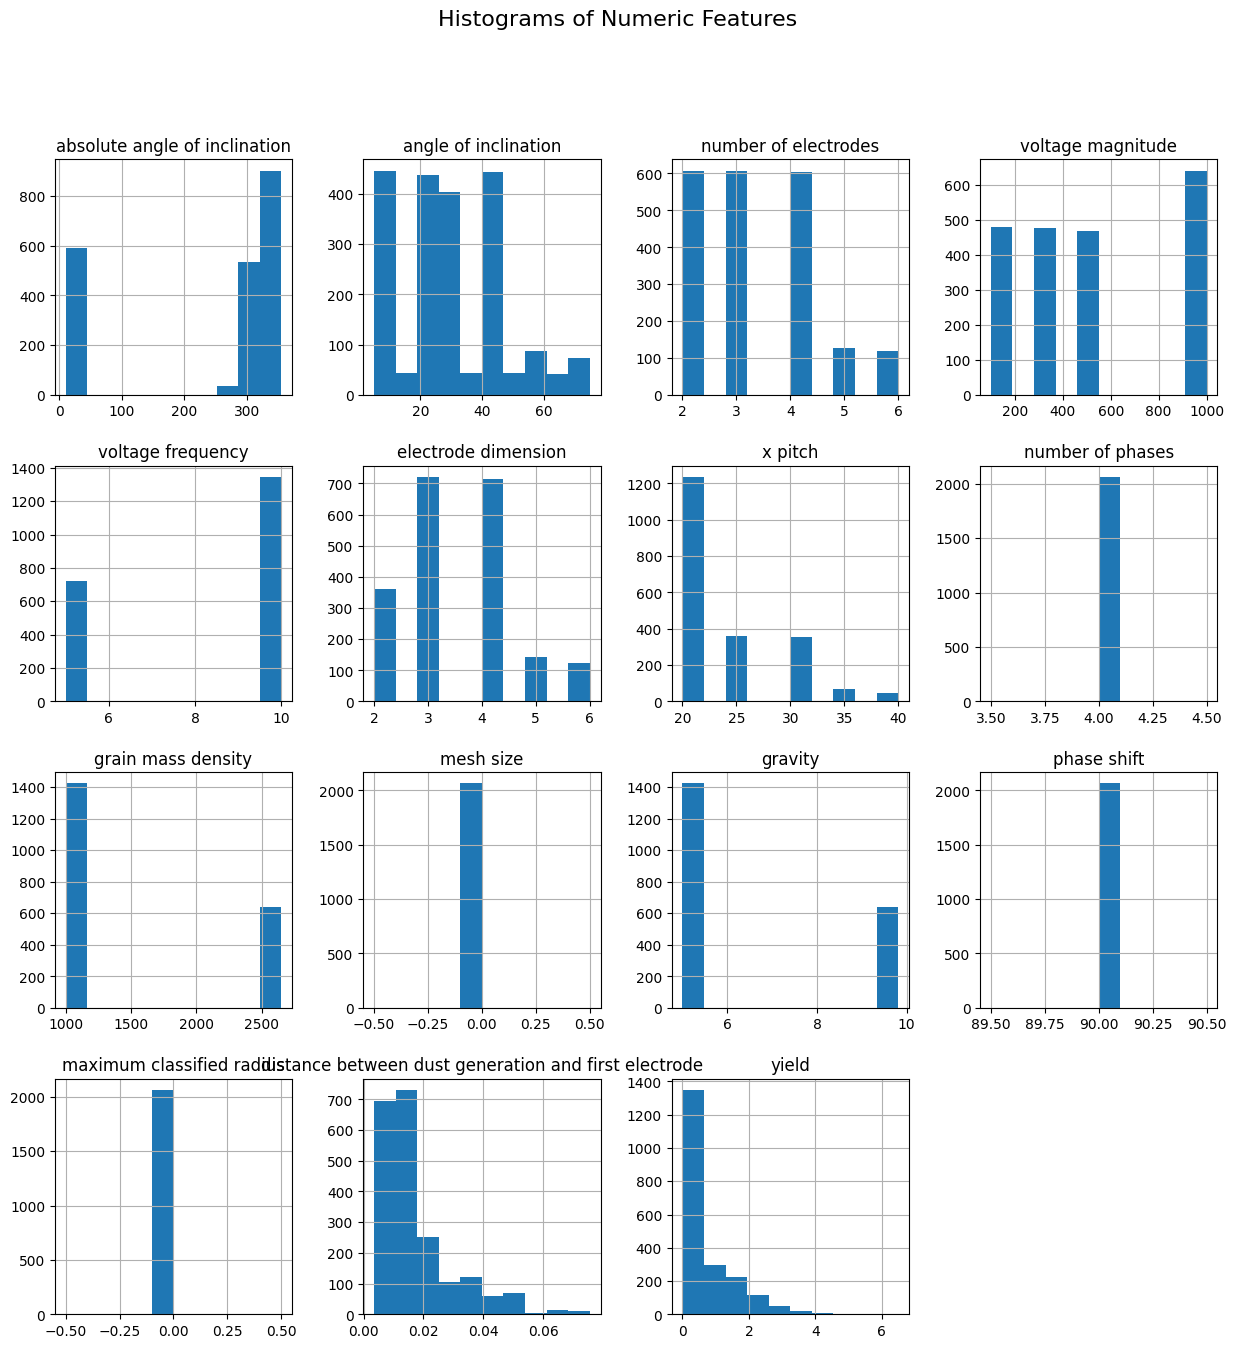

In [8]:
import matplotlib.pyplot as plt

numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [10]:
numeric_features = ['absolute angle of inclination', 'number of electrodes', 'electrode dimension',
                    'x pitch', 'distance between dust generation and first electrode', 'voltage magnitude',
                    'voltage frequency', 'grain mass density', 'gravity',
                    'angle of inclination']
drop_features = ['number of phases','mesh size',
                 'phase shift', 'maximum classified radius', ] # Angle removed to avoid multicollinearity
target = "yield"

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(target, axis=1)  # Features (independent variables)
y = data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

numeric_transformer = StandardScaler()
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['absolute angle of inclination',
                                  'number of electrodes', 'electrode dimension',
                                  'x pitch',
                                  'distance between dust generation and first '
                                  'electrode',
                                  'voltage magnitude', 'voltage frequency',
                                  'grain mass density', 'gravity',
                                  'angle of inclination']),
                                ('drop', 'drop',
                                 ['number of phases', 'mesh size',
                                  'phase shift',
                                  'maximum classified radius'])])

In [13]:
# Define RMSE calculation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:


# Models to be evaluated
models = {
    'dummy': DummyRegressor(strategy='mean'),
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'polynomial2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'polynomial3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'polynomial4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
}

param_grid = {
    'ridge': {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
    'lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1]}
}

In [15]:
import numpy as np

results_dict = {}  # dictionary to store all the results

# Fit models and perform hyperparameter tuning where applicable
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    if name in param_grid:
        # Hyperparameter tuning with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)
        grid_search.fit(X_train, y_train)
        cv_results = grid_search.cv_results_
        best_index = grid_search.best_index_
        results_dict[name] = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
        }
    else:
        # Regular cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                                    scoring=make_scorer(rmse, greater_is_better=False),
                                    return_train_score=True,
                                    return_estimator=True)
        results_dict[name] = {
            'fit_time': np.mean(cv_results['fit_time']),
            'score_time': np.mean(cv_results['score_time']),
            'train_score': -np.mean(cv_results['train_score']),  # Convert to positive
            'test_score': -np.mean(cv_results['test_score'])     # Convert to positive
        }

In [16]:
# Display the results
pd.DataFrame(results_dict).T

,fit_time,score_time,train_score,test_score,best_params
dummy,0.004262,0.002007,0.871941,0.870535,NaN
linear_regression,0.005874,0.002712,0.612964,0.615619,NaN
ridge,0.006073,0.002925,0.612969,0.615593,{'ridge__alpha': 1.0}
lasso,0.007914,0.003507,0.613002,0.615565,{'lasso__alpha': 0.001}
polynomial2,0.010355,0.003552,0.501537,0.521611,NaN
polynomial3,0.035612,0.003771,0.431995,0.510862,NaN
polynomial4,0.19335,0.013197,0.393033,0.730712,NaN
